# Display attributes of single cells and trajectory
This tutorial is designed to introduce you to the methods of displaying and understanding the attributes of individual cells and their trajectories.

In [1]:
#import some necessary libraries
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from napari.layers import Shapes
import livecellx.sample_data

## Data Preparation
Before diving into the displaying, we will use a sample dataset of images and masks that represent single-cell observations over time.

### Load sample dataset 
We specify the paths to the DIC (Differential Interference Contrast) and mask datasets. Subsequently, we utilize the tutorial_three_image_sys function from the livecellx.sample_data module to load the DIC and mask datasets.

In [2]:
dic_dataset_path = Path("../datasets/test_data_STAV-A549/DIC_data")
mask_dataset_path = Path("../datasets/test_data_STAV-A549/mask_data")
dic_dataset, mask_dataset = livecellx.sample_data.tutorial_three_image_sys(dic_dataset_path, mask_dataset_path, dir="../datasets")

|-----> Downloading data to ../datasets\test_data_STAV-A549.zip
|-----> Data already exists at ../datasets\test_data_STAV-A549.zip
|-----> Extracting data to ../datasets
3 png img file paths loaded;
3 tif img file paths loaded;


Here, we prepare single-cell data from the mask dataset. This data will be used to track cell trajectories.

In [3]:
## Prepare the single-cell data from dataset
from livecellx.core.io_sc import prep_scs_from_mask_dataset
single_cells = prep_scs_from_mask_dataset(mask_dataset, dic_dataset)

100%|██████████| 3/3 [00:07<00:00,  2.37s/it]


## Track single cells
We perform tracking on single cells to obtain their trajectories.

In [4]:
# Import tracking utilities
from livecellx.track.sort_tracker_utils import (
    gen_SORT_detections_input_from_contours,
    update_traj_collection_by_SORT_tracker_detection,
    track_SORT_bbox_from_contours,
    track_SORT_bbox_from_scs
)

# Perform the tracking
traj_collection = track_SORT_bbox_from_scs(single_cells, dic_dataset, mask_dataset=mask_dataset, max_age=1, min_hits=1)

Get a sample trajectory

In [5]:
trajectory = traj_collection.get_all_trajectories()[0]

## Display single cells and trajectories using Napari
Napari is a multi-dimensional image viewer, which is designed for browsing, annotating, and analyzing large multi-dimensional images. Now let's display the atrributes of single cells, their trajectories and its collection of single-cell trajectories using Napari.

### Create Napari viewer
We initialize a Napari viewer to display the DIC images.

In [6]:
import napari
from livecellx.core.sc_seg_operator import ScSegOperator, create_sc_seg_napari_ui
# Create Napari viewer
viewer = napari.view_image(dic_dataset.to_dask(), name="dic_image", cache=True)

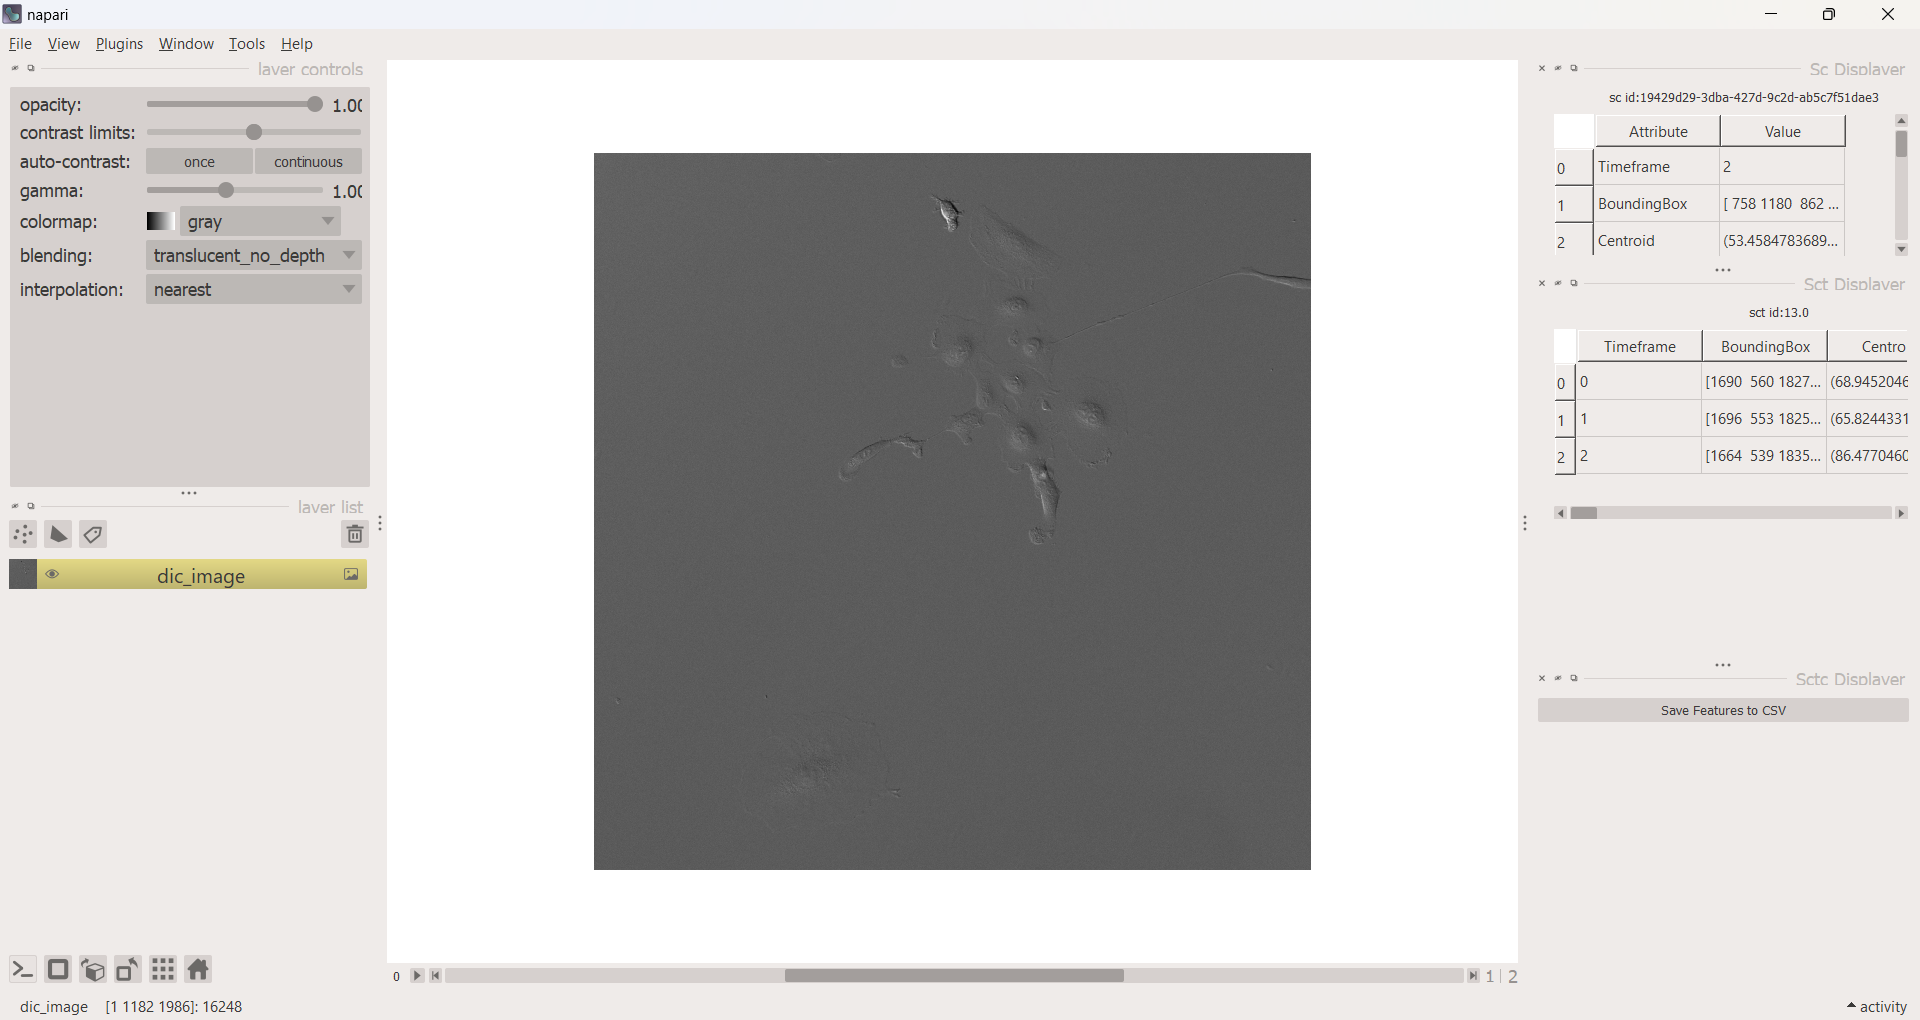

### Create displayer
Now, we create a Single Cell (Sc) Displayer to display individual cell and its attributes in the Napari viewer.

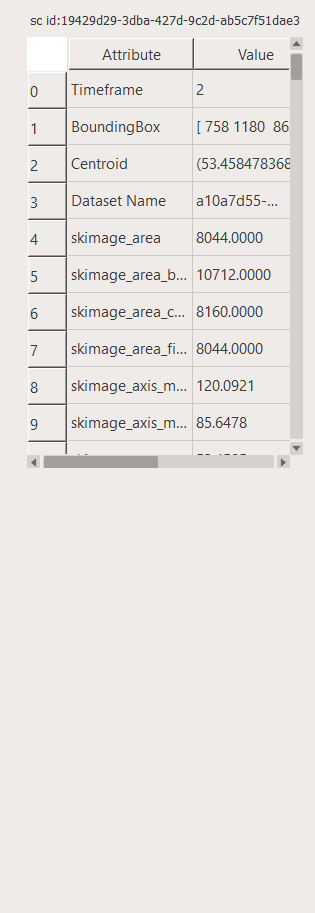

In [7]:
# Importing displayer utilities
from livecellx.core.displayer import Displayer, ScDisplayer, SctDisplayer, create_sc_displayer_napari_ui, create_sct_displayer_napari_ui, create_sctc_displayer_napari_ui

# Creating an Sc Displayer
sample_sc = single_cells[10]
sc_displayer = ScDisplayer(sc=sample_sc, viewer=viewer)
create_sc_displayer_napari_ui(sc_displayer)

We then create a Single Cell Trajectory (Sct) Displayer to display cell trajectories.

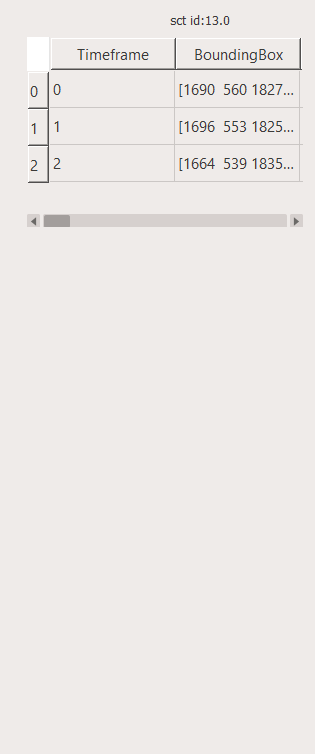

In [8]:
# Create the SctDisplayer
sct_displayer = SctDisplayer(trajectory=trajectory, viewer=viewer)
# Generate the napari UI for Sct
create_sct_displayer_napari_ui(sct_displayer)

Finally, we create a generic Displayer to display the collected trajectories in the Napari viewer.

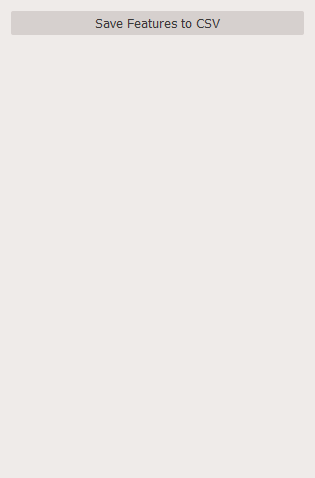

In [9]:
# Create the generic Displayer for Sctc
sctc_displayer = Displayer(viewer=viewer)
# Generate the napari UI for Sctc
create_sctc_displayer_napari_ui(sctc_displayer, sctc=traj_collection)